Importazione librerie necessarie

In [19]:
import numpy as np
import matplotlib.pyplot as plt

### Algoritmo di *Eulero*

In [64]:
# funzione per calcolare le soluzioni con eulero
def eulero(x_0, t_0, delta_t, n_steps, f):
    x_arr = np.zeros(n_steps + 1)
    t_arr = np.arange(t_0, round(delta_t * (n_steps + 1), 5), delta_t)
    
    x_arr[0] = x_0
    
    for i in range(1, n_steps + 1):
        x_arr[i] = x_arr[i - 1] + f(x_arr[i - 1])*delta_t
    return (x_arr, t_arr)

### Algoritmo di *Eulero modificato*

In [65]:
# funzione per calcolare le soluzioni con eulero modificato
def eulero_mod(x_0, t_0, delta_t, n_steps, f):
    x_arr = np.zeros(n_steps + 1)
    t_arr = np.arange(t_0, round(delta_t * (n_steps + 1), 5), delta_t)
    
    x_arr[0] = x_0
    
    for i in range(1, n_steps + 1):
        x_tilde = x_arr[i - 1] + f(x_arr[i - 1])*delta_t
        x_arr[i] = x_arr[i - 1] + 0.5*(f(x_arr[i - 1]) + f(x_tilde))*delta_t
    return (x_arr, t_arr)

### Algoritmo di *Runge Kutta 4*

In [70]:
def rk4(x_0, t_0, delta_t, n_steps, f):
    x_arr = np.zeros(n_steps + 1)
    t_arr = np.arange(t_0, round(delta_t * (n_steps + 1), 5), delta_t)
    
    x_arr[0] = x_0
    
    for i in range(1, n_steps + 1):
        k1 = f(x_arr[i - 1])*delta_t
        k2 = f(x_arr[i - 1] + 0.5*k1)*delta_t
        k3 = f(x_arr[i - 1] + 0.5*k2)*delta_t
        k4 = f(x_arr[i - 1] + k3)*delta_t
        x_arr[i] = x_arr[i - 1] + 1/6*(k1 + 2*k2 + 2*k3 + k4)
    return (x_arr, t_arr)

Definisco le funzioni che mi servono per fare un test con l'equazione logistica

In [66]:
def logistic_equation(N, r, K):
    return r * N * (1 - N/K)

def logistic_solution(t, N_0, K, r): 
    return K/(1 + (K - N_0)/N_0*np.exp(-r * t))

### Test con l'equazione logistica dei tre algoritmi

In [67]:
# definizione parametri iniziali
r = 1
K = 4
N_0 = 5
t_0 = 0
t_f = 10
delta_t = 0.1
n_step = 100
initial_populations = [0, 0.2, 2.5, 4, 4.5]

Text(0, 0.5, '$N(t)$')

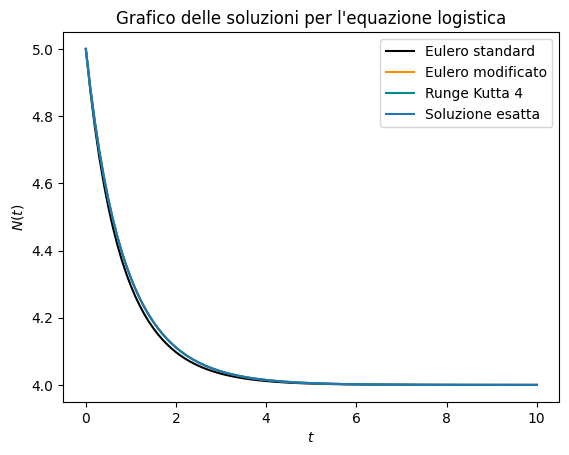

In [73]:
#soluzione numerica 
(x_arr, t_arr) = eulero(N_0, t_0, delta_t, n_step, lambda x: logistic_equation(x, r, K))
plt.plot(t_arr, x_arr, label = "Eulero standard", c = 'k')

(x_arr, t_arr) = eulero_mod(N_0, t_0, delta_t, n_step, lambda x: logistic_equation(x, r, K))
plt.plot(t_arr, x_arr, label = "Eulero modificato", c = "darkorange")

(x_arr, t_arr) = rk4(N_0, t_0, delta_t, n_step, lambda x: logistic_equation(x, r, K))
plt.plot(t_arr, x_arr, label = "Runge Kutta 4", c = "darkcyan")

#soluzione esatta
exact_solution = logistic_solution(t_arr, N_0, K, r) 
plt.plot(t_arr, exact_solution, label = "Soluzione esatta")

plt.legend()
plt.title("Grafico delle soluzioni per l'equazione logistica")
plt.xlabel(r'$t$')
plt.ylabel(r'$N(t)$')

Text(0, 0.5, '$N(t)$')

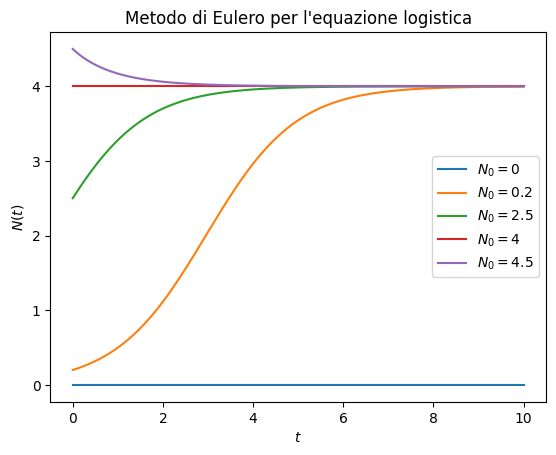

In [40]:
for N_0 in initial_populations:
    # uso Eulero "standard"
    (x_arr, t_arr) = eulero(N_0, t_0, delta_t, n_step, lambda x: logistic_equation(x, r, K))
    plt.plot(t_arr, x_arr, label = r"$N_0 = ${}".format(N_0))

plt.legend()
plt.title("Metodo di Eulero per l'equazione logistica")
plt.xlabel(r'$t$')
plt.ylabel(r'$N(t)$')

### Calcolo dell'errore

In [75]:
def sin_exact_solution(t): 
    return 2 * np.arctan(np.exp(t) / (1 + np.sqrt(2)))

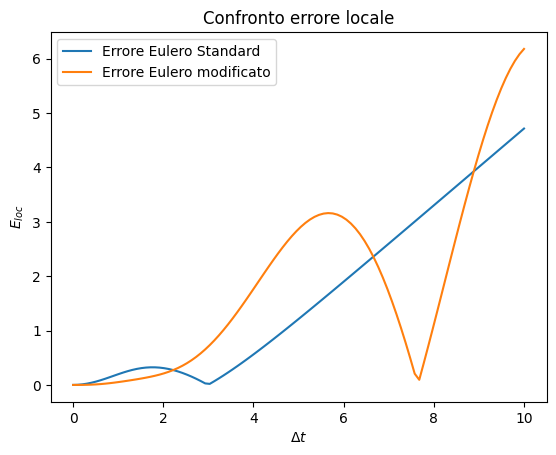

In [78]:
x_0 = np.pi / 4
t_0 = 0
#dato che facciamo un solo passo, delta è uguale anche a t_f
time_steps = np.linspace(10, 0.001, 100)
#questo array è una matrice lungo la prima colonna ci sarà l'errore di Eulero standard, lungo la seconda colonna l'errore di Eulero modificato
Err_euler_loc = np.zeros((len(time_steps), 2))
x_true = sin_exact_solution(time_steps)

for indx, delta in enumerate(time_steps):
    (x_arr, t_arr) = eulero(x_0, t_0, delta, 1, np.sin)
    Err_euler_loc[indx, 0] = np.abs(x_true[indx] - x_arr[1])
    #plt.plot(ts, xs)

    (x_arr, t_arr) = eulero_mod(x_0, t_0, delta, 1, np.sin)
    Err_euler_loc[indx, 1] = np.abs(x_true[indx] - x_arr[1])

plt.plot(time_steps, Err_euler_loc[:,0], label = "Errore Eulero Standard")
plt.plot(time_steps, Err_euler_loc[:,1], label = "Errore Eulero modificato")
plt.title("Confronto errore locale")
plt.xlabel(r"$\Delta t$")
plt.ylabel(r"$E_{loc}$")
plt.legend()

Con il log di time_steps

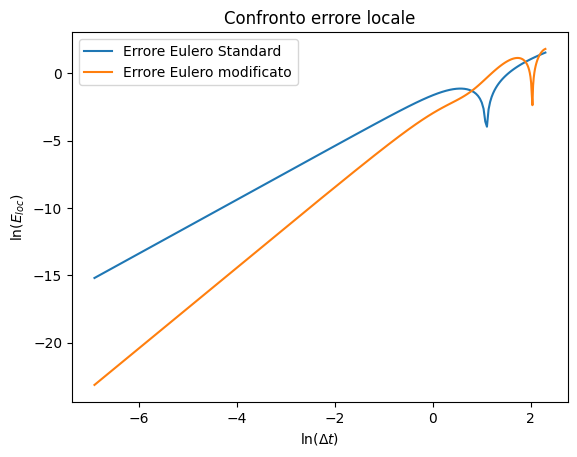

In [79]:
plt.plot(np.log(time_steps), np.log(Err_euler_loc[:,0]), label = "Errore Eulero Standard")
plt.plot(np.log(time_steps), np.log(Err_euler_loc[:,1]), label = "Errore Eulero modificato")
plt.title("Confronto errore locale")
plt.xlabel(r"$\ln(\Delta t)$")
plt.ylabel(r"$\ln(E_{loc})$")
plt.legend()

In [91]:
pip install -U scikit-learn scipy matplotlib

                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB 3.3 MB/s eta 0:00:03
     -                                        0.4/9.2 MB 4.5 MB/s eta 0:00:02
     --                                       0.6/9.2 MB 4.8 MB/s eta 0:00:02
     ---                                      0.8/9.2 MB 4.6 MB/s eta 0:00:02
     ----                                     1.1/9.2 MB 4.8 MB/s eta 0:00:02
     -----                                    1.3/9.2 MB 4.7 MB/s eta 0:00:02
     ------                                   1.5/9.2 MB 4.8 MB/s eta 0:00:02
     -------                                  1.8/9.2 MB 4.9 MB/s eta 0:00:02
     --------                                 2.0/9.2 MB 4.9 MB/s eta 0:00:02
     ---------                                2.3/9.2 MB 5.0 MB/s eta 0:00:02
     -----------                              2.6/9.2 MB 5.1 MB/s eta 0:00:02
     -----------                              2.7/9.2 MB 4.9 MB/s eta 0

In [2]:
from sklearn.linear_model import LinearRegression

In [93]:
reg = [
    LinearRegression().fit(np.log(time_steps).reshape(-1,1), np.log(Err_euler_loc[:,0]).reshape(-1,1)), 
    LinearRegression().fit(np.log(time_steps).reshape(-1,1), np.log(Err_euler_loc[:,1]).reshape(-1,1))
]

print("Coefficenti angolari")
print(f"Eulero standard = {reg[0].coef_[0]}")
print(f"Eulero modificato = {reg[1].coef_[0]}")

Coefficenti angolari
Eulero standard = [1.66939352]
Eulero modificato = [2.37616932]
